In [68]:
#import the modules
import pandas as pd # load and manipulate data and for One-Hot Encoding
import numpy as np # calculate the mean and standard deviation
import matplotlib.pyplot as plt # drawing graphs
from sklearn.tree import DecisionTreeClassifier # a classification tree
from sklearn.tree import plot_tree # draw a classification tree
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.model_selection import cross_val_score # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn import metrics

In [69]:
#import the dataset 
df=pd.read_csv(r"C:\Users\garvs\Documents\python\classification_true\processed.cleveland.data.csv",header=None)

In [70]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [71]:
df.columns=['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [72]:
#getting the datatypes of the 
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

The fact that the ca and thal columns have object data types suggests there is something wrong in them. Object datatypes are used when there are mixtures of things, like a mixture of numbers and letters. In theory, both vessels and thal should just have a few values representing different categories, so let's investigate what's going on by printing out their unique values. We'll start with ca:

In [73]:

print(df['thal'].unique())
df['ca'].unique()

['6.0' '3.0' '7.0' '?']


array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

We see that ca and thal contains numbers (0.0, 3.0, 2.0 and 1.0) and questions marks (?). The question mark represts missing data.

In [74]:
len(df.loc[(df['thal']=='?') | (df['ca']=='?' )])

6

In [75]:
df.loc[(df['thal']=='?') | (df['ca']=='?' )]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [76]:
len(df)

303

So 6 of the 303 rows, or 2%, contain missing values. Since 303 - 6 = 297, and 297 is plenty of data to build a classification tree, we will remove the rows with missing values, rather than try to impute their values. We do this by selecting all of the rows that do not contain question marks in either the ca or thal columns:

In [77]:
heart = df.loc[(df['thal'] !='?') & (df['ca'] !='?' )]

In [78]:
len(heart)

297

In [79]:
heart['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [80]:
heart['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

Now we will split data.
We will use the conventional notation of X (capital X) to represent the columns of data that we will use to make classifications and y (lower case y) to represent the thing we want to predict. In this case, we want to predict hd (heart disease).

In [81]:
X=heart.drop('hd',axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [82]:
y=heart['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [83]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [84]:
x['chest_pain'].unique()

NameError: name 'x' is not defined

So, we see that age, restbp, chol and thalach are all float64, which is good, because we want them to be floating point numbers. All of the other columns, however, need to be inspected to make sure they only contain reasonable values, and some of them need to change. This is because, while scikit learn Decision Trees natively support continuous data, like resting blood preasure (restbp) and maximum heart rate (thalach), they do not natively support categorical data, like chest pain (cp), which contains 4 different categories. Thus, in order to use categorical data with scikit learn Decision Trees, we have to use a trick that converts a column of categorical data into multiple columns of binary values. This trick is called One-Hot Encoding.

In [85]:
pd.get_dummies(X,columns=['cp']).head()


,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [86]:
X['restecg'].unique()

array([2., 0., 1.])

In [87]:
x_data=pd.get_dummies(X,columns=['cp','restecg','slope','thal']).head()

In [88]:
x_data.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


Now we need to talk about the 3 categorical columns that only contain 0s and 1s: sex, fbs (fasting blood sugar), and exang (exercise induced angina). As we can see, One-Hot Encoding converts a column with more than 2 categories, like cp (chest pain) into multiple columns of 0s and 1s. Since sex, fbs, and exang only have 2 categories and only contain 0s and 1s to begin with, we do not have to do anything special to them, so we're done formatting the data for the Classification Tree.

Now, one last thing before we build a Classification Tree. y doesn't just contain 0s and 1s. Instead, it has 5 different levels of heart disease. 0 = no heart disease and 1-4 are various degrees of heart disease. We can see this with unique():

In [89]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [90]:
i=y>0
y[i]=1

In [91]:
y.unique()

array([0, 1], dtype=int64)

In [92]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: hd, dtype: int64

At long last, the data is correctly formatted for making a Classification Tree. Now we simply split the data into training and testing sets and build the tree.

In [93]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42)


In [94]:
clf =DecisionTreeClassifier(random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

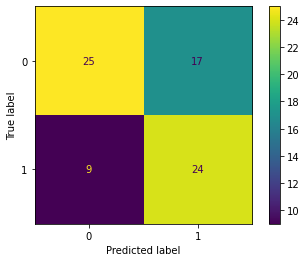

In [95]:
plot_confusion_matrix(clf,x_test,y_test)

In the confusion matrix, we see that of the 25 + 17 = 42 people that did not have Heart Disease, 25 (59%) were correctly classified. And of the 9 + 24 = 33 people that have Heart Disease, 24 (73%) were correctly classified. Can we do better? One thing that might be holding this Classification Tree back is that it may have over fit the training dataset. So let's prune the tree. Pruning, in theory, should solve the over fitting problem and give us better results.


In [96]:
ct_predict=clf.predict(x_test)
print("accuracy:{:.4f}".format(metrics.accuracy_score(y_test,ct_predict)))
print("classification report")
print(metrics.classification_report(y_test,ct_predict))


accuracy:0.6533
classification report
              precision    recall  f1-score   support

           0       0.74      0.60      0.66        42
           1       0.59      0.73      0.65        33

    accuracy                           0.65        75
   macro avg       0.66      0.66      0.65        75
weighted avg       0.67      0.65      0.65        75




# Cost Complexity Pruning
Decision Trees are notorious for being overfit to the Training Dataset, so let's prune this tree in hopes that we can improve the accuracy with the Testing Dataset.
Pruning a decision tree is all about finding the right value for the pruning parameter, alpha, which controls how little or how much pruning happens. One way to find the optimal value for alpha is to plot the accuracy of the tree as a function of different values for alpha. We'll do this for both the Training Dataset and the Testing Dataset.


In [97]:
from sklearn.tree import DecisionTreeClassifier
#cost complexity pruning 
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)



Now let's graph the accuracy of the trees using the Training Dataset and the Testing Dataset as a function of alpha.

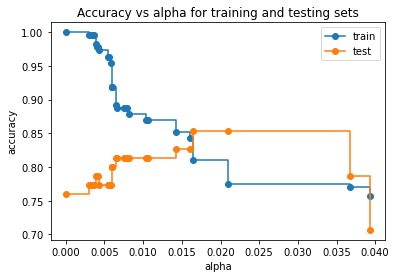

In [98]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In the graph above, we see that the accuracy for the Testing Dataset hits its maximum value when alpha is about 0.016. After this value for alpha, the accuracy of the Training Dataset drops off and that suggest we should set ccp_alpha=0.016.

Now let's use cross validation to find the optimal value for ccp_alpha.

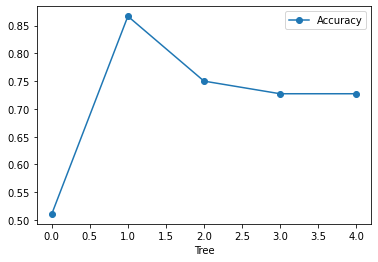

In [99]:
from sklearn.model_selection import cross_val_score
clf=DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
scores=cross_val_score(clf,x_train,y_train,cv=5)
df=pd.DataFrame(data={'Tree' : range(5), 'Accuracy' : scores})
df.plot(x='Tree',y='Accuracy',marker='o')

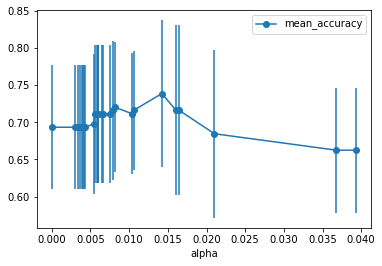

In [100]:
alpha_values=[]

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores=cross_val_score(clf,x_train,y_train,cv=5)
    alpha_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
    
alpha_results=pd.DataFrame(alpha_values,columns=['alpha','mean_accuracy','std']) 
alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o')
    
    

Using cross validation, we can see that, over all, instead of setting ccp_alpha=0.016, we need to set it to something closer to 0.014. We can find the exact value with:

In [101]:
alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]

,alpha,mean_accuracy,std
21,0.014225,0.738788,0.098832


In [102]:
ideal_alpha = alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]['alpha']
ideal_alpha

21    0.014225
Name: alpha, dtype: float64

In [103]:
ideal_alpha=float(ideal_alpha)
ideal_alpha

0.014224751066856332

Now we have the ideal value for alpha and we can build, evaluate and draw the final Classification Tree.



In [104]:
clf_ideal=DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_alpha)
clf_ideal=clf_ideal.fit(x_train,y_train)

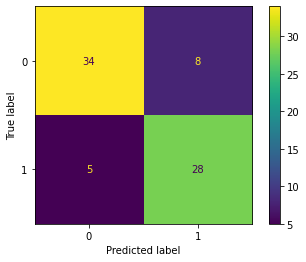

In [105]:
plot_confusion_matrix(clf_ideal,x_test,y_test)

Of the 34 + 8 = 42 people that did not have heart disease, 34 (81%) were correctly classified. This is a big improvement over the full sized tree, which only correctly classified 25 (59%) of the patients without heart disease. Of the 5 + 28 = 33 people with heart disease, 28 (85%) were correctly classified. Again, this is an improvement over the full sized tree, which only correctly classified 24 (73%) of the patients with heart disease. Yay for pruning!

In [106]:
ct_predict_test=clf_ideal.predict(x_test)
print("accuracy:{:.4f}".format(metrics.accuracy_score(y_test,ct_predict_test)))
print("classification report")
print(metrics.classification_report(y_test,ct_predict_test))


accuracy:0.8267
classification report
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.78      0.85      0.81        33

    accuracy                           0.83        75
   macro avg       0.82      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



[Text(482.8846153846154, 356.7375, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No Hd'),
 Text(257.53846153846155, 254.8125, 'thal <= 6.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No Hd'),
 Text(128.76923076923077, 152.8875, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No Hd'),
 Text(64.38461538461539, 50.96249999999998, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No Hd'),
 Text(193.15384615384616, 50.96249999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Yes Hd'),
 Text(386.3076923076923, 152.8875, 'cp <= 3.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Yes Hd'),
 Text(321.9230769230769, 50.96249999999998, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No Hd'),
 Text(450.69230769230774, 50.96249999999998, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Yes Hd'),
 Text(708.2307692307693, 254.8125, 'cp <= 3.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes Hd'),
 Text(6

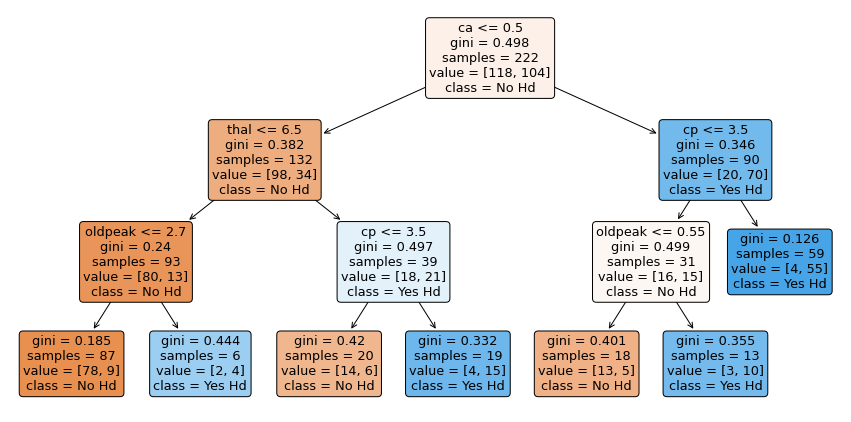

In [107]:
from sklearn import tree
plt.figure(figsize=(15,7.5))
tree.plot_tree(clf_ideal,filled=True,rounded=True,class_names=["No Hd","Yes Hd"],feature_names=X.columns)